In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics, ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
Train= pd.read_csv('Traindata.csv')
Test= pd.read_csv('Testdata.csv')

In [4]:
Traindata= Train.sample(frac=0.1)
Testdata= Test.sample(frac=0.1)

In [5]:
Traindata.head()

,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,language,city,age,gender,registered_via,target
2533737,my library,Artist more,top-hits-for-artist,246270.0,2122,Lisa Ono (小野リサ),Willie Nelson,52.0,5,27,male,9,1
5053818,search,Search,song,207621.0,465,Ryu,Ryu,31.0,1,0,Unknown,4,0
4498048,my library,Local playlist more,local-playlist,183716.0,444,Tiffany,Stephanie Young| Kim Te Sung| Jake K,52.0,5,24,female,9,1
6556490,radio,Radio,radio,244558.0,465,林俊傑 (JJ Lin),JJ Lin,3.0,15,29,female,3,0
513695,my library,Local playlist more,local-playlist,204486.0,465,孫子涵 (Niko Sun),孫子涵,3.0,11,45,male,9,1


In [6]:
# Object data to category
for col in Traindata.select_dtypes(include=['object']).columns:
    Traindata[col] = Traindata[col].astype('category')
    
# Encoding categorical features
for col in Traindata.select_dtypes(include=['category']).columns:
    Traindata[col] = Traindata[col].cat.codes

In [7]:
Traindata.head()

,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,language,city,age,gender,registered_via,target
2533737,4,1,11,246270.0,2122,7482,24639,52.0,5,27,2,9,1
5053818,7,15,9,207621.0,465,10587,20617,31.0,1,0,0,4,0
4498048,4,8,5,183716.0,444,12815,22187,52.0,5,24,1,9,1
6556490,6,14,8,244558.0,465,15998,10500,3.0,15,29,1,3,0
513695,4,8,5,204486.0,465,15205,26971,3.0,11,45,2,9,1


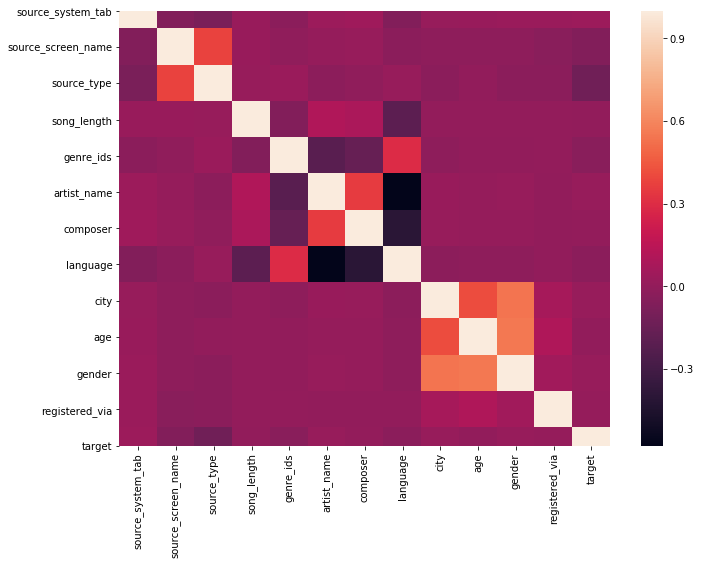

In [8]:
# Сorrelation matrix
plt.figure(figsize=[11,8])
sns.heatmap(Traindata.corr())
plt.show()

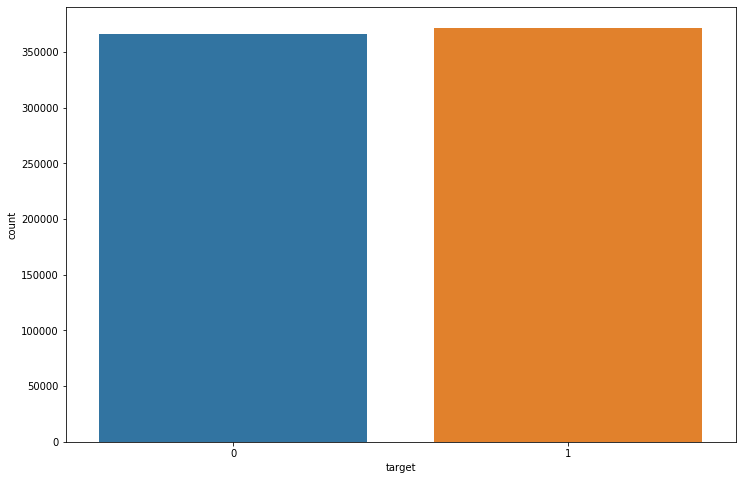

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(Traindata['target'])

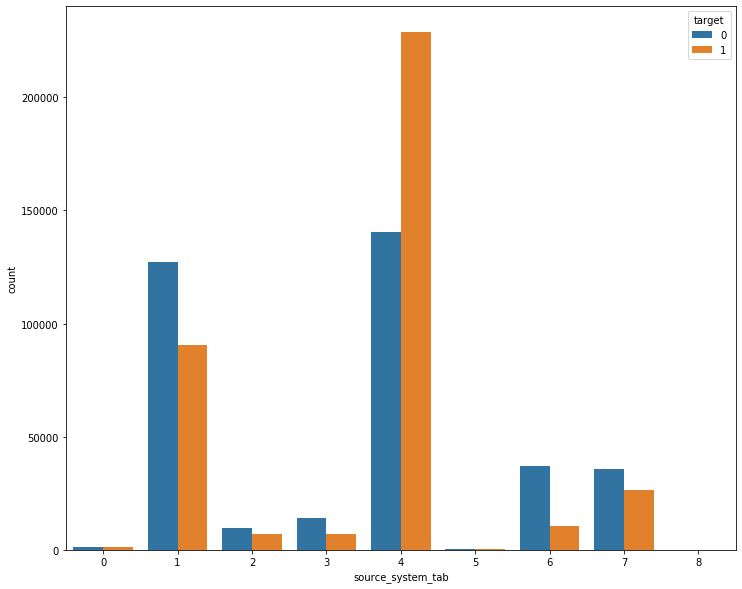

In [10]:
plt.figure(figsize=(12,10))
sns.countplot(Traindata['source_system_tab'],hue=Traindata['target'])

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12')]

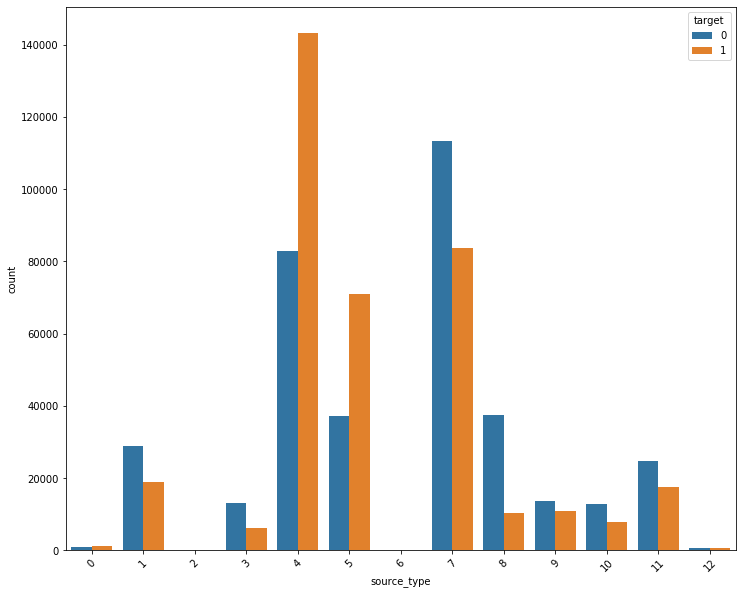

In [11]:
plt.figure(figsize=(12,10))
g = sns.countplot(Traindata['source_type'],hue=Traindata['target'])
locs, labels = plt.xticks()
g.set_xticklabels(labels,rotation=45)

In [12]:
target = Traindata.pop('target')

In [13]:
# Train & Test split
train_data, test_data, train_labels, test_labels = train_test_split(Traindata, target, test_size = 0.3)

In [14]:
# Model with the best estimator
model = ensemble.RandomForestClassifier(n_estimators=150, max_depth=10)
model.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
# Predicting
predict_labels = model.predict(test_data)

In [16]:
#CV Test Result
print(metrics.classification_report(test_labels, predict_labels))

              precision    recall  f1-score   support

           0       0.63      0.64      0.63    109834
           1       0.64      0.63      0.63    111489

    accuracy                           0.63    221323
   macro avg       0.63      0.63      0.63    221323
weighted avg       0.63      0.63      0.63    221323



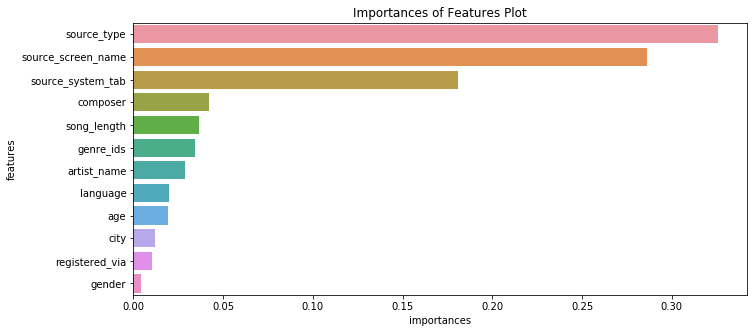

In [17]:
#Feature importance
plot = pd.DataFrame({'features': Traindata.columns[Traindata.columns != 'target'],
                        'importances': model.feature_importances_})
plot = plot.sort_values('importances', ascending=False)
plt.figure(figsize=[11,5])
sns.barplot(x = plot.importances, y = plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [25]:
# Object data to category
for col in Testdata.select_dtypes(include=['object']).columns:
    Testdata[col] = Testdata[col].astype('category')
    
# Encoding categorical features
for col in Testdata.select_dtypes(include=['category']).columns:
    Testdata[col] = Testdata[col].cat.codes

In [26]:
# Predicting for real test data
predict = model.predict(Testdata)

In [27]:
predict[:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [29]:
#Keep the predict data as the submission csv file
predict = pd.DataFrame({'result':predict})
predict.to_csv("sample_submission.csv",index=False)